## **IT3212 - Assignment 1 - Group 25**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['axes.xmargin'] = 0
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from IPython.display import display, HTML

RANDOM_SEED = 0
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [40]:
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False) 

- [Task 1 - Data Exploration](#task_1)
- [Task 2 - Data Cleaning](#task_2)
- [Task 3 - Handling Outliers](#task_3)
- [Task 4 - Data Transformation](#task_4)
- [Task 5 - Data Splitting](#task_5)
- [Task 6 - Bonus Task](#task_6)

 ___
 <a id='task_1'></a>
### **TASK 1 - Data Exploration (10p)**
___

**(a) Explore the dataset by**
- ✅ displaying the first few rows
- ✅ summary statistics
- ✅ data types of each column

**(b) Identify**
- ✅ missing values and outliers
- ✅ unique values in categorical columns

### **Load datasets**

In [41]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_oil = pd.read_csv('../data/oil.csv')
df_holidays_events = pd.read_csv('../data/holidays_events.csv')
df_stores = pd.read_csv('../data/stores.csv')
df_transactions = pd.read_csv('../data/transactions.csv')

In [42]:
df_stores = df_stores.rename(columns={'type': 'type_stores'})
df_holidays_events = df_holidays_events.rename(columns={'type': 'type_holidays_events'})

In [43]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_holidays_events['date'] = pd.to_datetime(df_holidays_events['date'])
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

dataframes = {
    'Training dataset': df_train,
    'Oil price dataset' :df_oil,
    'Holidays and events dataset': df_holidays_events,
    'Stores dataset': df_stores,
    'Transactions dataset': df_transactions
}

### **Display the first 5 rows**

In [44]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    display(df.head())

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.140
2,2013-01-03,92.970
3,2013-01-04,93.120
4,2013-01-07,93.200


,date,type_holidays_events,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


,store_nbr,city,state,type_stores,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


### **Display the summary statistics for numerical columns**

In [45]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    display(df.describe())

,id,date,store_nbr,sales,onpromotion
count,3000888.000,3000888,3000888.000,3000888.000,3000888.000
mean,1500443.500,2015-04-24 08:27:04.703088384,27.500,357.776,2.603
min,0.000,2013-01-01 00:00:00,1.000,0.000,0.000
25%,750221.750,2014-02-26 18:00:00,14.000,0.000,0.000
50%,1500443.500,2015-04-24 12:00:00,27.500,11.000,0.000
75%,2250665.250,2016-06-19 06:00:00,41.000,195.847,0.000
max,3000887.000,2017-08-15 00:00:00,54.000,124717.000,741.000
std,866281.892,NaN,15.586,1101.998,12.219


,date,dcoilwtico
count,1218,1175.000
mean,2015-05-02 12:00:00,67.714
min,2013-01-01 00:00:00,26.190
25%,2014-03-03 06:00:00,46.405
50%,2015-05-02 12:00:00,53.190
75%,2016-06-30 18:00:00,95.660
max,2017-08-31 00:00:00,110.620
std,NaN,25.630


,date
count,350
mean,2015-04-24 00:45:15.428571392
min,2012-03-02 00:00:00
25%,2013-12-23 06:00:00
50%,2015-06-08 00:00:00
75%,2016-07-03 00:00:00
max,2017-12-26 00:00:00


,store_nbr,cluster
count,54.000,54.000
mean,27.500,8.481
std,15.732,4.693
min,1.000,1.000
25%,14.250,4.000
50%,27.500,8.500
75%,40.750,13.000
max,54.000,17.000


,date,store_nbr,transactions
count,83488,83488.000,83488.000
mean,2015-05-20 16:07:40.866232064,26.939,1694.602
min,2013-01-01 00:00:00,1.000,5.000
25%,2014-03-27 00:00:00,13.000,1046.000
50%,2015-06-08 00:00:00,27.000,1393.000
75%,2016-07-14 06:00:00,40.000,2079.000
max,2017-08-15 00:00:00,54.000,8359.000
std,NaN,15.608,963.287


### **Display the data type of each column**

In [46]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    display(df.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           3000888 non-null  int64         
 1   date         3000888 non-null  datetime64[ns]
 2   store_nbr    3000888 non-null  int64         
 3   family       3000888 non-null  object        
 4   sales        3000888 non-null  float64       
 5   onpromotion  3000888 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  350 non-null    datetime64[ns]
 1   type_holidays_events  350 non-null    object        
 2   locale                350 non-null    object        
 3   locale_name           350 non-null    object        
 4   description           350 non-null    object        
 5   transferred           350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   store_nbr    54 non-null     int64 
 1   city         54 non-null     object
 2   state        54 non-null     object
 3   type_stores  54 non-null     object
 4   cluster      54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


None

### **Check for missing values**

In [47]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    display(df.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

date           0
dcoilwtico    43
dtype: int64

date                    0
type_holidays_events    0
locale                  0
locale_name             0
description             0
transferred             0
dtype: int64

store_nbr      0
city           0
state          0
type_stores    0
cluster        0
dtype: int64

date            0
store_nbr       0
transactions    0
dtype: int64

### **Check for outliers (time-series inspection)**

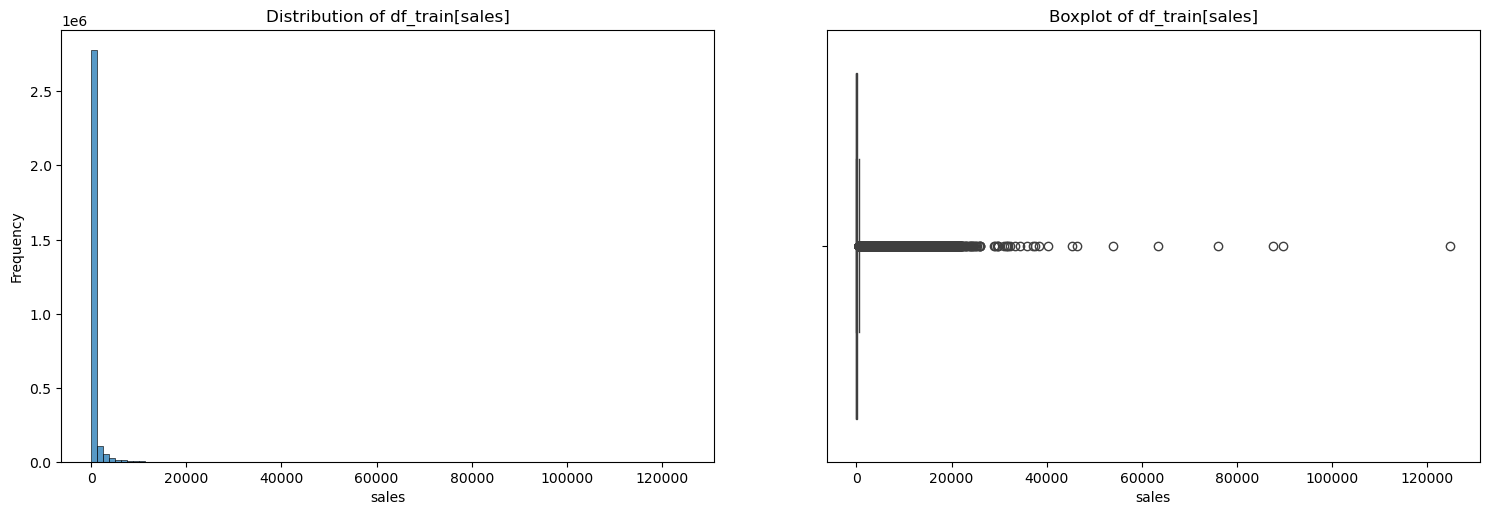

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.tight_layout(pad=5.0)
    
sns.histplot(df_train['sales'], bins=100, ax=axes[0])
axes[0].set_title(f'Distribution of df_train[sales]')
axes[0].set_xlabel('sales')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df_train['sales'], ax=axes[1])
axes[1].set_title(f'Boxplot of df_train[sales]')
axes[1].set_xlabel('sales')
plt.show()

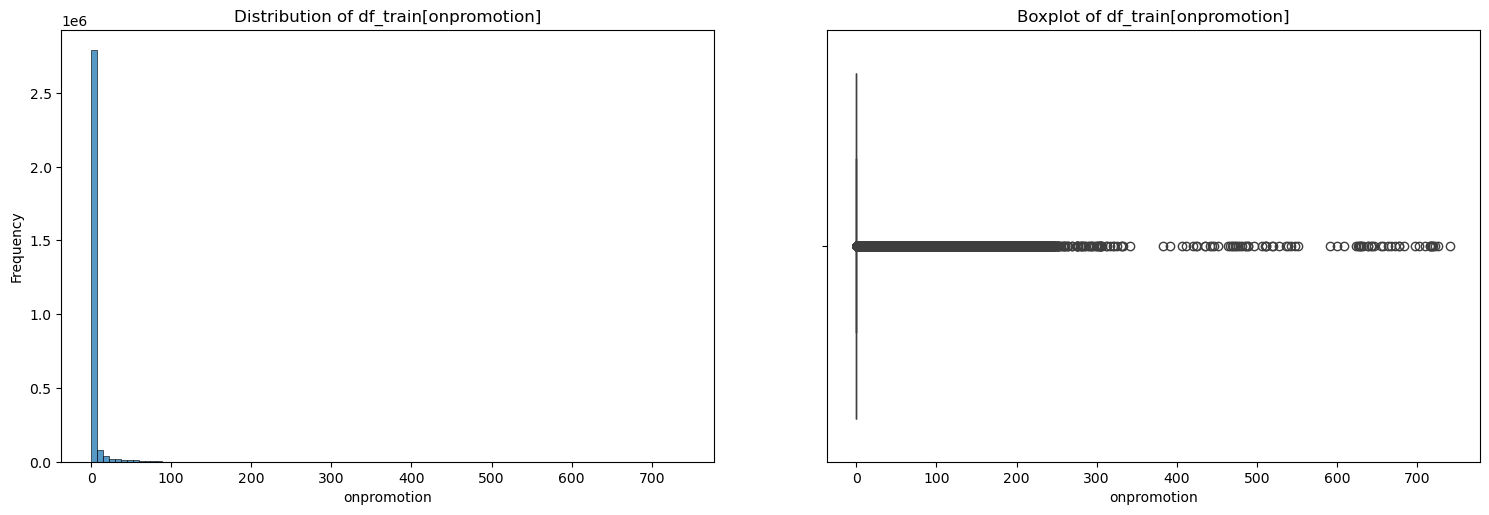

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.tight_layout(pad=5.0)
    
sns.histplot(df_train['onpromotion'], bins=100, ax=axes[0])
axes[0].set_title(f'Distribution of df_train[onpromotion]')
axes[0].set_xlabel('onpromotion')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df_train['onpromotion'], ax=axes[1])
axes[1].set_title(f'Boxplot of df_train[onpromotion]')
axes[1].set_xlabel('onpromotion')
plt.show()

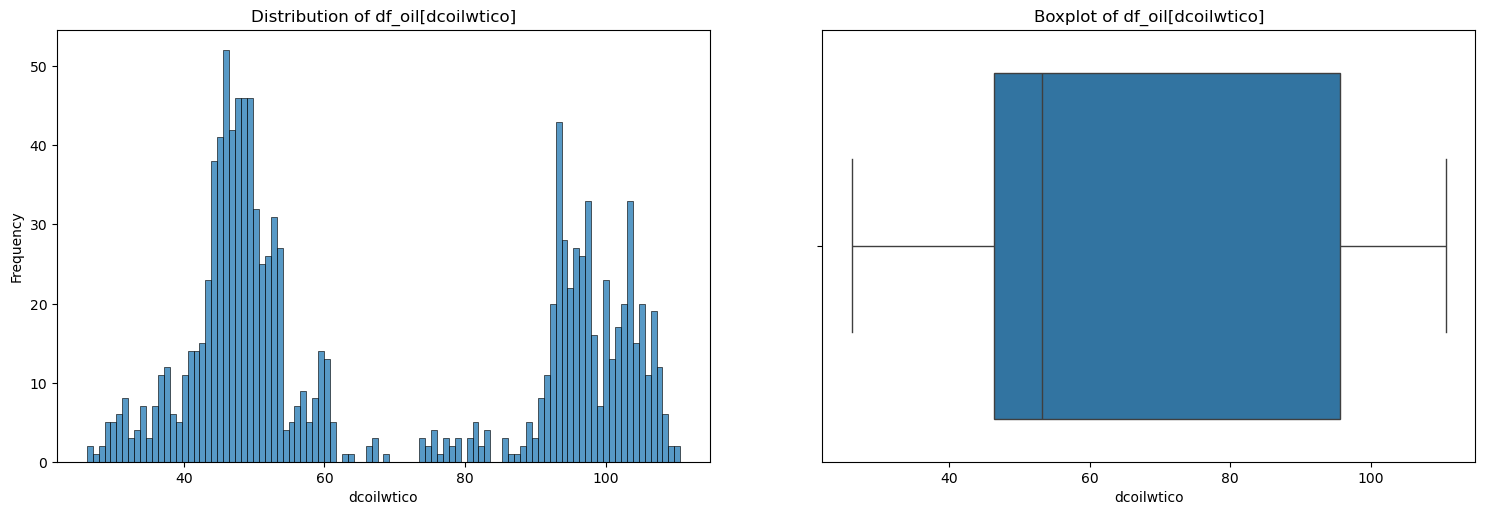

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.tight_layout(pad=5.0)
    
sns.histplot(df_oil['dcoilwtico'], bins=100, ax=axes[0])
axes[0].set_title(f'Distribution of df_oil[dcoilwtico]')
axes[0].set_xlabel('dcoilwtico')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df_oil['dcoilwtico'], ax=axes[1])
axes[1].set_title(f'Boxplot of df_oil[dcoilwtico]')
axes[1].set_xlabel('dcoilwtico')
plt.show()

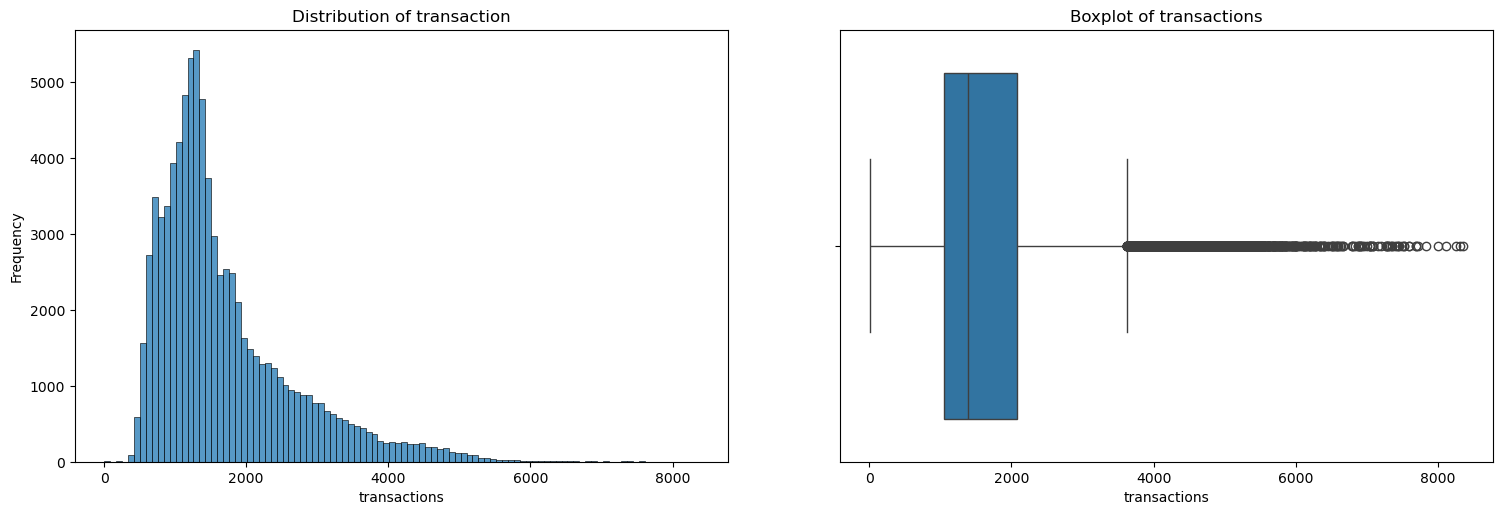

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.tight_layout(pad=5.0)
    
sns.histplot(df_transactions['transactions'], bins=100, ax=axes[0])
axes[0].set_title(f'Distribution of transaction')
axes[0].set_xlabel('transactions')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df_transactions['transactions'], ax=axes[1])
axes[1].set_title(f'Boxplot of transactions')
axes[1].set_xlabel('transactions')
plt.show()

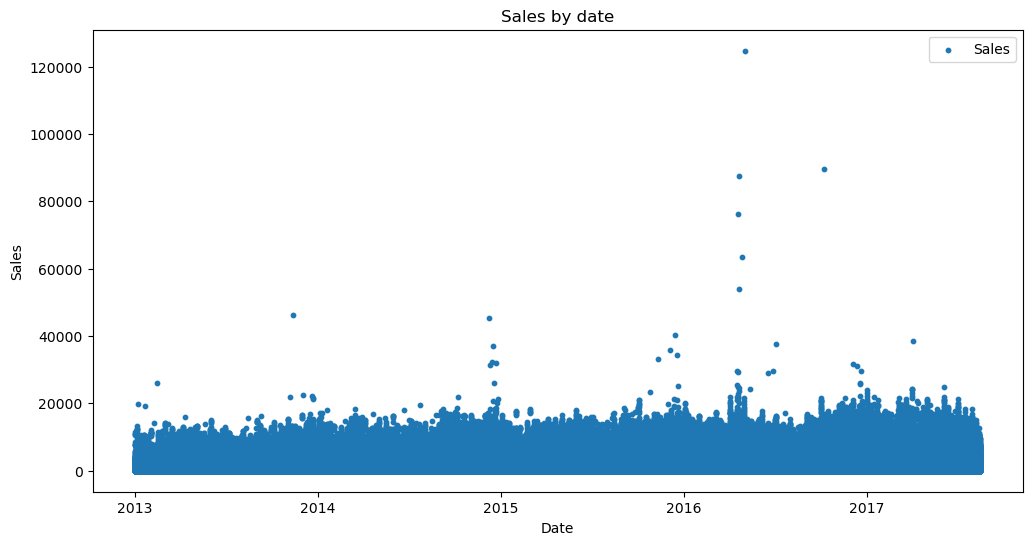

In [52]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df_train['date'], y=df_train['sales'], label='Sales', marker='o', s=10)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by date')
plt.legend()
plt.show()

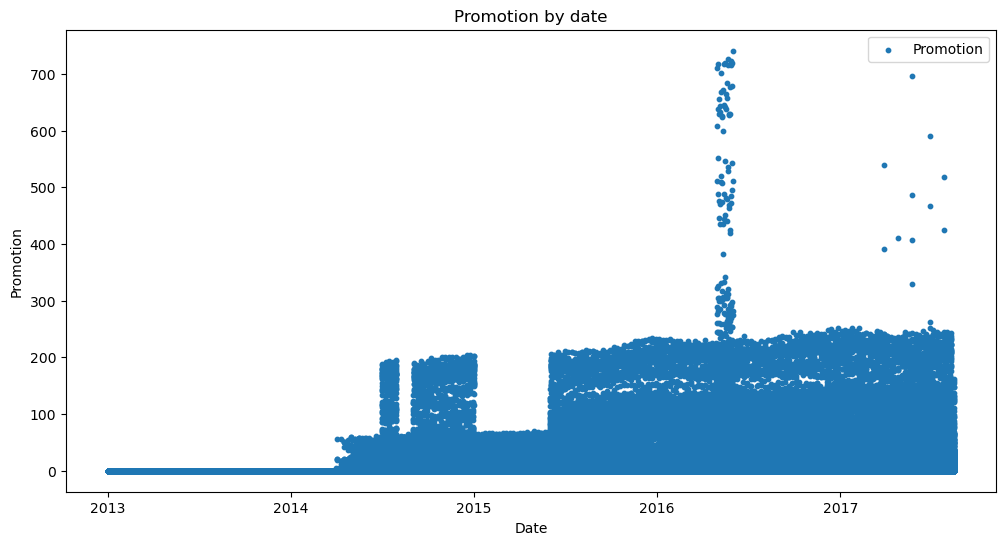

In [53]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df_train['date'], y=df_train['onpromotion'], label='Promotion', marker='o', s=10)
plt.xlabel('Date')
plt.ylabel('Promotion')
plt.title('Promotion by date')
plt.legend()
plt.show()

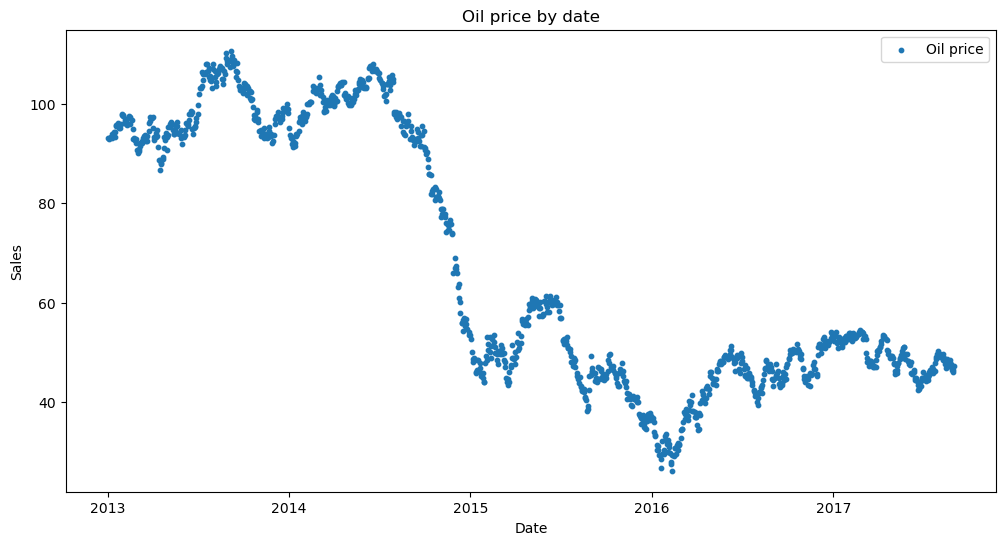

In [57]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df_oil['date'], y=df_oil['dcoilwtico'], label='Oil price', marker='o', s=10)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Oil price by date')
plt.legend()
plt.show()

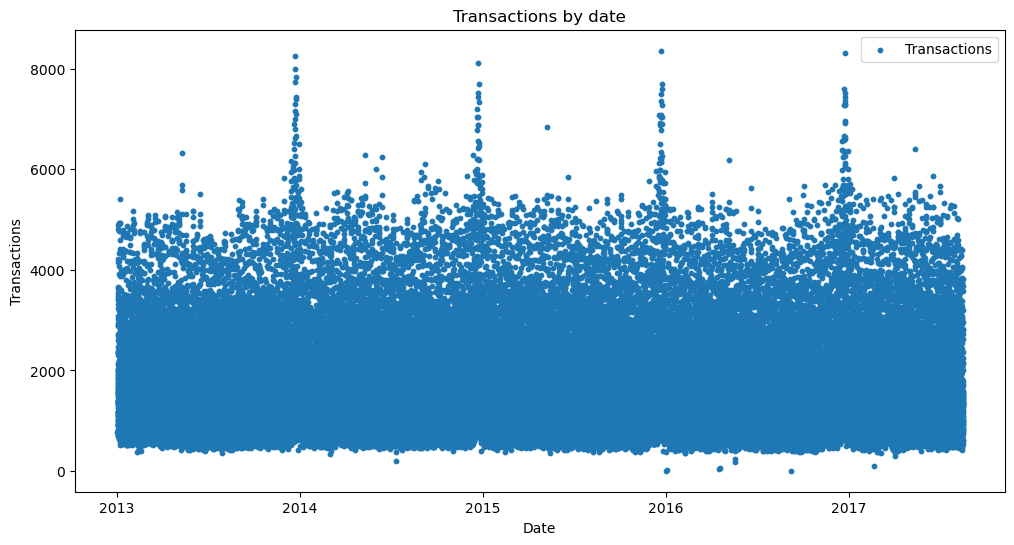

In [55]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df_transactions['date'], y=df_transactions['transactions'], label='Transactions', marker='o', s=10)
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Transactions by date')
plt.legend()
plt.show()

### **Check for unique values in categorical columns**

In [56]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    columns_to_display = list(df.select_dtypes(include=["object"]).columns) 
    if 'store_nbr' in df:
        columns_to_display.append('store_nbr')
    columns_to_display = [column for column in columns_to_display if column != 'date']
    display(
        HTML(
            pd.DataFrame(
                [
                    {
                        "Column Name": column,
                        "Unique Values": ", ".join(map(str, df[column].unique())),
                    }
                    for column in columns_to_display
                ]
            ).to_html(index=False)
        )
    )

Column Name,Unique Values
family,"AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOOKS, BREAD/BAKERY, CELEBRATION, CLEANING, DAIRY, DELI, EGGS, FROZEN FOODS, GROCERY I, GROCERY II, HARDWARE, HOME AND KITCHEN I, HOME AND KITCHEN II, HOME APPLIANCES, HOME CARE, LADIESWEAR, LAWN AND GARDEN, LINGERIE, LIQUOR,WINE,BEER, MAGAZINES, MEATS, PERSONAL CARE, PET SUPPLIES, PLAYERS AND ELECTRONICS, POULTRY, PREPARED FOODS, PRODUCE, SCHOOL AND OFFICE SUPPLIES, SEAFOOD"
store_nbr,"1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 51, 52, 53, 54, 6, 7, 8, 9"


Column Name,Unique Values
type_holidays_events,"Holiday, Transfer, Additional, Bridge, Work Day, Event"
locale,"Local, Regional, National"
locale_name,"Manta, Cotopaxi, Cuenca, Libertad, Riobamba, Puyo, Guaranda, Imbabura, Latacunga, Machala, Santo Domingo, El Carmen, Cayambe, Esmeraldas, Ecuador, Ambato, Ibarra, Quevedo, Santo Domingo de los Tsachilas, Santa Elena, Quito, Loja, Salinas, Guayaquil"
description,"Fundacion de Manta, Provincializacion de Cotopaxi, Fundacion de Cuenca, Cantonizacion de Libertad, Cantonizacion de Riobamba, Cantonizacion del Puyo, Cantonizacion de Guaranda, Provincializacion de Imbabura, Cantonizacion de Latacunga, Fundacion de Machala, Fundacion de Santo Domingo, Cantonizacion de El Carmen, Cantonizacion de Cayambe, Fundacion de Esmeraldas, Primer Grito de Independencia, Fundacion de Riobamba, Fundacion de Ambato, Fundacion de Ibarra, Cantonizacion de Quevedo, Independencia de Guayaquil, Traslado Independencia de Guayaquil, Dia de Difuntos, Independencia de Cuenca, Provincializacion de Santo Domingo, Provincializacion Santa Elena, Independencia de Guaranda, Independencia de Latacunga, Independencia de Ambato, Fundacion de Quito-1, Fundacion de Quito, Fundacion de Loja, Navidad-4, Cantonizacion de Salinas, Navidad-3, Navidad-2, Puente Navidad, Navidad-1, Navidad, Navidad+1, Puente Primer dia del ano, Primer dia del ano-1, Primer dia del ano, Recupero puente Navidad, Recupero puente primer dia del ano, Carnaval, Viernes Santo, Dia del Trabajo, Dia de la Madre-1, Dia de la Madre, Batalla de Pichincha, Fundacion de Guayaquil-1, Fundacion de Guayaquil, Inauguracion Mundial de futbol Brasil, Mundial de futbol Brasil: Ecuador-Suiza, Mundial de futbol Brasil: Ecuador-Honduras, Mundial de futbol Brasil: Ecuador-Francia, Mundial de futbol Brasil: Octavos de Final, Mundial de futbol Brasil: Cuartos de Final, Mundial de futbol Brasil: Semifinales, Mundial de futbol Brasil: Tercer y cuarto lugar, Mundial de futbol Brasil: Final, Black Friday, Cyber Monday, Recupero Puente Navidad, Recupero Puente Primer dia del ano, Terremoto Manabi, Terremoto Manabi+1, Terremoto Manabi+2, Terremoto Manabi+3, Terremoto Manabi+4, Terremoto Manabi+5, Terremoto Manabi+6, Terremoto Manabi+7, Terremoto Manabi+8, Terremoto Manabi+9, Terremoto Manabi+10, Terremoto Manabi+11, Terremoto Manabi+12, Terremoto Manabi+13, Terremoto Manabi+14, Terremoto Manabi+15, Terremoto Manabi+16, Terremoto Manabi+17, Terremoto Manabi+18, Terremoto Manabi+19, Terremoto Manabi+20, Terremoto Manabi+21, Terremoto Manabi+22, Terremoto Manabi+23, Terremoto Manabi+24, Terremoto Manabi+25, Terremoto Manabi+26, Terremoto Manabi+27, Terremoto Manabi+28, Terremoto Manabi+29, Terremoto Manabi+30, Traslado Batalla de Pichincha, Traslado Fundacion de Guayaquil, Traslado Primer Grito de Independencia, Puente Dia de Difuntos, Recupero Puente Dia de Difuntos, Traslado Primer dia del ano, Traslado Fundacion de Quito"


Column Name,Unique Values
city,"Quito, Santo Domingo, Cayambe, Latacunga, Riobamba, Ibarra, Guaranda, Puyo, Ambato, Guayaquil, Salinas, Daule, Babahoyo, Quevedo, Playas, Libertad, Cuenca, Loja, Machala, Esmeraldas, Manta, El Carmen"
state,"Pichincha, Santo Domingo de los Tsachilas, Cotopaxi, Chimborazo, Imbabura, Bolivar, Pastaza, Tungurahua, Guayas, Santa Elena, Los Rios, Azuay, Loja, El Oro, Esmeraldas, Manabi"
type_stores,"D, B, C, E, A"
store_nbr,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54"


Column Name,Unique Values
store_nbr,"25, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 36, 53, 20, 29, 21, 42, 22, 52"


___
<a id='task_2'></a>
### **TASK 2 - Data Cleaning (20p)**
___
**(a) Handling Missing Values** ✅ 

**(b) Choose appropriate methods to handle missing values** ✅ 

**(c) Justify your choices for handling missing data** ✅ 